In [1]:
import pandas as pd
import openpyxl

In [5]:
# pip install openpyxl 
!ls

Untitled.ipynb                   summary_threat.csv
summary_discrim_percent.csv      summary_threat_percent.csv
summary_econ_percent.csv         summary_threat_percent_total.csv
summary_threat


In [3]:
# Load year data

d = pd.read_excel('2022_raw.xlsx', engine='openpyxl')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [12]:
d.columns

Index(['Отметка времени',
       'Как вы себя определяете (ваша гендерная идентичность)?',
       'Идентифицируете ли вы себя как трансгендерного человека? ',
       'Ваша сексуальная ориентация', 'Являетесь ли вы интерсекс-человеком?',
       'Ваш возраст', 'Где вы проживаете? ',
       'Выберите, пожалуйста, регион, в котором вы проживаете',
       'Федеральный округ',
       'Кто из ваших друзей знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших родных знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших одноклассников/однокурсников/коллег (в нынешнем учебном/рабочем коллективе) знает о том, что вы ЛГБТК+ персона?',
       'Ваш круг общения, в основном, состоит из...',
       'Ваш круг общения – это, в основном, (по вашим ощущениям)…',
       'Ваше образование',
       'Охарактеризуйте, пожалуйста, ваше общее материальное положение.',
       'Где вы преимущественно жили в 2022 году?',
       'Есть ли у вас иждивенцы - те, кто не имеет собственного источника дохода и ко

In [4]:
d.columns[8:75]

Index(['Федеральный округ',
       'Кто из ваших друзей знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших родных знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших одноклассников/однокурсников/коллег (в нынешнем учебном/рабочем коллективе) знает о том, что вы ЛГБТК+ персона?',
       'Ваш круг общения, в основном, состоит из...',
       'Ваш круг общения – это, в основном, (по вашим ощущениям)…',
       'Ваше образование',
       'Охарактеризуйте, пожалуйста, ваше общее материальное положение.',
       'Где вы преимущественно жили в 2022 году?',
       'Есть ли у вас иждивенцы - те, кто не имеет собственного источника дохода и кого вы финансово поддерживаете на постоянной основе, например, дети, родственники, партнёр(ка)?',
       'Как вам кажется, влияет ли ваша сексуальная ориентация или трансгендерность на ваше экономическое положение?',
       'Если вы ответили положительно на предыдущий вопрос, расскажите, пожалуйста, подробнее, как именно ваша сексуальная ориента

In [59]:
# Subset columns
df=d.iloc[:, [8,75] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ

# Count per okrug
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts.to_csv('left_because_of_war_by_district.csv')

counts

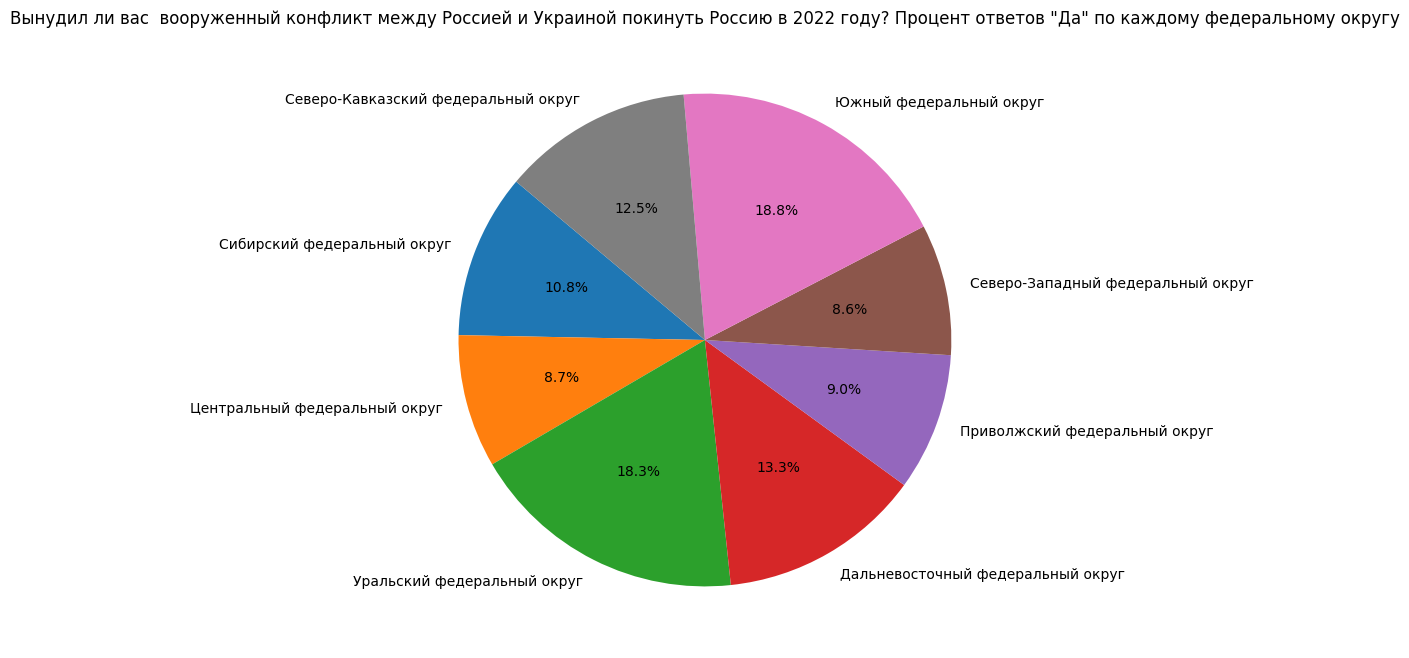

In [69]:
import matplotlib.pyplot as plt

yes_counts = [25, 90, 334, 9, 62, 51, 492, 40]
no_counts = [177, 809, 1262, 50, 537, 466, 1796, 239]
districts = df[first_col].unique()
yes_percentages = [yes / (yes + no) for yes, no in zip(yes_counts, no_counts)]

plt.figure(figsize=(12, 8))
plt.pie(yes_percentages, labels=districts, autopct='%1.1f%%', startangle=140)
plt.title('Вынудил ли вас  вооруженный конфликт между Россией и Украиной покинуть Россию в 2022 году? Процент ответов "Да" по каждому федеральному округу')
plt.show()



In [57]:
df=d.iloc[:, [8,73] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('mobeffect_by_district.csv')

In [42]:
df=d.iloc[:, [46] ]
counts = df.value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('policeresult_by_district.csv')

In [33]:
df=d.iloc[:, [8,22] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('incometype_by_district.csv')

In [26]:
df=d.iloc[:, [8,14] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('edu_by_district.csv')

In [21]:
df=d.iloc[:, [8,11] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('schoolworkKnow_by_district.csv')

In [19]:
df=d.iloc[:, [8,10] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('familyKnow_by_district.csv')

In [15]:
df=d.iloc[:, [8,21] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
# counts.to_csv('income_by_district.csv')

In [17]:
df=d.iloc[:, [8,9] ]
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

counts=pd.DataFrame(counts)
counts
counts.to_csv('friendsKnow_by_district.csv')

In [111]:
counts=pd.DataFrame(counts)
counts

Были ли у вас в 2022 году какие-либо проблемы при поиске места работы/учебы из-за сексуальной ориентации и/или трансгендерности?  \
Федеральный округ                                                                                                                                                                            
Дальневосточный федеральный округ   Да                                                                 26.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                                54.0                                                                                  
Приволжский федеральный округ       Да                                                                 76.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                               336.0                                                                                  
Северо-Западный федеральный округ   Да                                                                150.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                               615.0                                                                                  
Северо-Кавказский федеральный округ Да                                                                 10.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                                21.0                                                                                  
Сибирский федеральный округ         Да                                                                 63.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                               205.0                                                                                  
Уральский федеральный округ         Да                                                                 47.0                                                                                  
                                    Затрудняюсь ответить                                                NaN                                                                                  
                                    Нет                                                               174.0                                                                                  
Центральный федеральный округ       Да                                                                220.0                                                                                  
                                    Затрудняюсь ответить            

In [108]:
df=pd.DataFrame(df)
# sum(df.loc[df['Федеральный округ']=='Приволжский федеральный округ'].iloc[:,6]=='Да')

0

In [6]:
# Discrimination
df = d.iloc[:, [8,28,30,51,52,55,57,58,63,65] ] 


#Count da/net frequencies per okrug
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)
    
counts

{'Были ли у вас в 2022 году какие-либо проблемы при поиске места работы/учебы из-за сексуальной ориентации и/или трансгендерности?': Федеральный округ                    Были ли у вас в 2022 году какие-либо проблемы при поиске места работы/учебы из-за сексуальной ориентации и/или трансгендерности?
 Дальневосточный федеральный округ    Нет                                                                                                                                  54
                                      Да                                                                                                                                   26
 Приволжский федеральный округ        Нет                                                                                                                                 336
                                      Да                                                                                                                                   76
 Севе

In [70]:

d = pd.read_excel('2022_raw.xlsx', engine='openpyxl')

#Select  related colums
# df = d.iloc[:, [8,17,20,24,25] ] #econ
# df = d.iloc[:, [8,28,30,51,52,55,57,58,63,65] ] #discrim
df= d.iloc[:, [8] + list(range(32, 36))+list(range(37, 42))] #threat

#coun frequencies
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts()#.fillna(0)

# # transform to data frame
counts=pd.DataFrame(counts)
counts['All'] = counts.iloc[:, 1:].sum(axis=1)


districts = df[first_col].unique()
district_percentages = {}
district_df_percentages = {}
district_df_count = {}
district_count = {}
distrcict_all={}
all_districts_yes = [0] * len(counts.columns)
all_districts_no = [0] * len(counts.columns)

# calculate percentages
for district in districts:
    total_yes = counts.loc[(district, 'Да'), 'All'] if (district, 'Да') in counts.index else 0
    total_no = counts.loc[(district, 'Нет'), 'All'] if (district, 'Нет') in counts.index else 0

#     print(total_yes)
#     print(total_no)
    if total_yes + total_no != 0: 
        district_percentages[district] =  (total_yes / (total_yes + total_no)) * 100
    else:
        district_percentages[district] = 0

    for col in counts.columns:
        da_count = counts.loc[(district, 'Да'), col] if (district, 'Да') in counts.index else 0
        net_count = counts.loc[(district, 'Нет'), col] if (district, 'Нет') in counts.index else 0
        
        if da_count + net_count != 0: 
            district_df_percentages[(district, col)] = (da_count / (da_count + net_count)) * 100
        elif (district, 'Да') not in counts.index:
            district_df_percentages[(district, col)] = 0
           
        else:
            district_df_percentages[(district, col)] = 100

#     print(data.loc[(district, 'Да')])
#     all_districts_yes += counts.loc[(district, 'Да')].values #if (district, 'Да') in data.index else [0] * len(data.columns)
#     all_districts_no += counts.loc[(district, 'Нет')].values #if (district, 'Нет') in data.index else [0] * len(data.columns)

    
# transform to data frame
# df_district_percentages = pd.DataFrame(list(district_percentages.items()), columns=['District', 'Percentage'])
df_district_df_percentages = pd.DataFrame(list(district_df_percentages.items()), columns=['District_Column', 'Percentage'])
df_district_df_percentages[['District', 'Column']] = pd.DataFrame(df_district_df_percentages['District_Column'].tolist(), 
                                                                  index=df_district_df_percentages.index)
df_district_df_percentages = df_district_df_percentages.pivot(index='District', columns='Column', values='Percentage')

# df_percentages = all_districts_yes/(all_districts_yes+all_districts_no)*100
# new_row = pd.Series(df_percentages, index=df_district_df_percentages.columns, name="Все")
# df_district_df_percentages = df_district_df_percentages.append(new_row)
averages = df_district_df_percentages.mean()
df_district_df_percentages.loc['Все'] = averages


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [21]:
d = pd.read_excel('2022_raw.xlsx', engine='openpyxl')

#Select  related colums
# df = d.iloc[:, [8,17,20,24,25] ] #econ
# df = d.iloc[:, [8,28,30,51,52,55,57,58,63,65] ] #discrim
df= d.iloc[:, [8] + list(range(32, 36))+list(range(37, 42))] #threat

#coun frequencies
counts = {}
first_col = df.columns[0] ##Федеральный округ
for col in df.columns[1:]:
    counts[col] = df.groupby(first_col)[col].value_counts().fillna(0)

# # transform to data frame
counts=pd.DataFrame(counts)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [24]:
counts['All'] = counts.iloc[:, 1:].sum(axis=1)

counts.index

MultiIndex([(  'Дальневосточный федеральный округ',  'Да'),
            (  'Дальневосточный федеральный округ', 'Нет'),
            (      'Приволжский федеральный округ',  'Да'),
            (      'Приволжский федеральный округ', 'Нет'),
            (  'Северо-Западный федеральный округ',  'Да'),
            (  'Северо-Западный федеральный округ', 'Нет'),
            ('Северо-Кавказский федеральный округ',  'Да'),
            ('Северо-Кавказский федеральный округ', 'Нет'),
            (        'Сибирский федеральный округ',  'Да'),
            (        'Сибирский федеральный округ', 'Нет'),
            (        'Уральский федеральный округ',  'Да'),
            (        'Уральский федеральный округ', 'Нет'),
            (      'Центральный федеральный округ',  'Да'),
            (      'Центральный федеральный округ', 'Нет'),
            (            'Южный федеральный округ',  'Да'),
            (            'Южный федеральный округ', 'Нет')],
           names=['Федеральный округ', 

In [71]:
df_district_df_percentages

Column,All,Подвергались ли вы в 2022 году сексуализированному насилию (в том числе домогательствам и попыткам изнасилования) из-за вашей сексуальной ориентации и/или трансгендерности?,Подвергались ли вы в 2022 году физическому насилию из-за сексуальной ориентации и/или трансгендерности?,Сталкивались ли вы в 2022 году с грабежом по типу “подставных свиданий” ?,"Сталкивались ли вы в 2022 году с домашним насилием из-за сексуальной ориентации и/или трансгендерности (со стороны родителей, родственников, супругов, партнёров)?",Сталкивались ли вы в 2022 году с угрозами физическим насилием из-за сексуальной ориентации и/или трансгендерности?,Сталкивались ли вы в 2022 году с шантажом/вымогательством с угрозой раскрытия информации о вашей сексуальной ориентации или трансгендерности?,Сталкивались ли вы в 2022 году со случаями незаконного использования ваших персональных данных из-за вашей сексуальной ориентации и/или трансгендерности?,"Сталкивались ли вы в 2022 году со случаями причинения вреда вашему имуществу, уничтожения, кражи/хищения имущества из-за вашей сексуальной ориентации и/или трансгендерности?",Сталкивались ли именно вы в 2022 году с преследованиями в интернете из-за вашей сексуальной ориентации и/или трансгендерности?
District,,,,,,,,,,
Дальневосточный федеральный округ,14.047030,6.435644,8.910891,5.940594,17.326733,26.732673,18.316832,13.366337,7.920792,16.336634
Приволжский федеральный округ,12.388765,7.675195,7.675195,4.226919,13.459399,21.134594,15.795328,11.902113,7.675195,17.241379
Северо-Западный федеральный округ,9.249687,7.080201,5.764411,2.380952,14.285714,17.481203,8.959900,7.769424,5.137845,10.902256
Северо-Кавказский федеральный округ,11.864407,6.779661,11.864407,NaN,20.338983,22.033898,8.474576,13.559322,13.559322,10.169492
Сибирский федеральный округ,14.336394,10.350584,10.183639,6.176962,15.525876,27.378965,17.863105,13.522538,6.343907,17.529215
Уральский федеральный округ,13.660542,10.444874,9.090909,4.255319,15.280464,26.112186,18.762089,12.572534,6.576402,15.280464
Центральный федеральный округ,10.484047,8.304196,7.211538,3.452797,14.641608,18.444056,12.150350,9.353147,4.982517,12.543706
Южный федеральный округ,11.962366,9.677419,6.093190,3.584229,15.053763,22.580645,14.695341,9.677419,4.301075,16.129032
Все,12.249155,8.343472,8.349273,4.288253,15.739068,22.737278,14.377190,11.465354,7.062132,14.516522


In [501]:
df_district_df_percentages.to_csv('summary_discrim_percent.csv')

In [494]:
df_district_df_percentages.to_csv('summary_econ_percent.csv')

In [497]:
df_district_df_percentages.to_csv('summary_threat_percent.csv')

In [424]:
unique_values = {col: df_discrim[col].unique() for col in df_discrim.columns}
unique_values

{'Федеральный округ': array(['Сибирский федеральный округ', 'Центральный федеральный округ',
        'Уральский федеральный округ', 'Дальневосточный федеральный округ',
        'Приволжский федеральный округ',
        'Северо-Западный федеральный округ', 'Южный федеральный округ',
        'Северо-Кавказский федеральный округ'], dtype=object),
 'Были ли у вас в 2022 году какие-либо проблемы при поиске места работы/учебы из-за сексуальной ориентации и/или трансгендерности?': array(['Да', nan, 'Нет'], dtype=object),
 'Приходилось ли вам в 2022 году терять работу/место учёбы из-за сексуальной ориентации и/или трансгендерности?': array(['Нет', 'Затрудняюсь ответить', 'Да'], dtype=object),
 'Приходилось ли вам в 2022 году сталкиваться с отказом в предоставлении медицинских услуг из-за вашей сексуальной ориентации и/или трансгендерностии?': array(['Да', nan, 'Нет'], dtype=object),
 'Приходилось ли вам в 2022 году сталкиваться с насильственными/ дискриминирующими действиями врачей на почве гом

# Organs

In [441]:
df.columns[47]

'Расскажите нам о вашем опыте взаимодействия с правоохранительными органами подробнее. Как происходило общение? Было ли это результативно?'

In [447]:
d=df.iloc[:, [45,46,47, 48] ]
unique_values = {col: d[col].unique() for col in d.columns}
unique_values

{'Полиция приняла ваше заявление?': array([nan, 'Да', 'Нет', 'Заявление подавалось онлайн',
        'Юрист посоветовал не писать заявления, а оставить разъяснение или как-то так назвал',
        'Приняли, сказав что угрозы расправы и  побои без видеодоказательств не являются основанием для уголовного дела. ',
        'Передумала подавать заявление',
        'Ребят есть люди где обращения в полицию без смысла, вы на теретории России были, чтобы задовать такие глупые вопросы ',
        'Заявления пытаются отфутболить ',
        'Да, но на протяжении 7 лет, ни кто не найдет , якобы. Хотя все известны .',
        'Вроде бы да',
        'Приняла, но особых действий не предприняла. Они просто поговорили с человеком. Человек оказался трусом и перестал открыто меня преследовать. Но за спиной всем рассказывает про меня.',
        'Сотрудники которые должны быть за полицию, закрывали на это глаза и бездействовали',
        'Заявление не писал. Я вызвал полицию, когда меня окружали толпой'],
    

In [445]:
 # Organs
    df.iloc[:, [45,46,47, 48] ]

,Полиция приняла ваше заявление?,Каковы были последствия вашего обращения в полицию?,Расскажите нам о вашем опыте взаимодействия с правоохранительными органами подробнее. Как происходило общение? Было ли это результативно?,"Почему вы не стали обращаться в правоохранительные органы, после того как пострадали от преступления на почве гомофобии/трансфобии?"
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
6434,NaN,NaN,NaN,NaN
6435,NaN,NaN,NaN,NaN
6436,NaN,NaN,NaN,Вы не верите в эффективность обращения в полицию
6437,NaN,NaN,NaN,Вы не верите в эффективность обращения в полиц...


# Eco

In [438]:
df.columns

Index(['Отметка времени',
       'Как вы себя определяете (ваша гендерная идентичность)?',
       'Идентифицируете ли вы себя как трансгендерного человека? ',
       'Ваша сексуальная ориентация', 'Являетесь ли вы интерсекс-человеком?',
       'Ваш возраст', 'Где вы проживаете? ',
       'Выберите, пожалуйста, регион, в котором вы проживаете',
       'Федеральный округ',
       'Кто из ваших друзей знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших родных знает о том, что вы ЛГБТК+ персона?',
       'Кто из ваших одноклассников/однокурсников/коллег (в нынешнем учебном/рабочем коллективе) знает о том, что вы ЛГБТК+ персона?',
       'Ваш круг общения, в основном, состоит из...',
       'Ваш круг общения – это, в основном, (по вашим ощущениям)…',
       'Ваше образование',
       'Охарактеризуйте, пожалуйста, ваше общее материальное положение.',
       'Где вы преимущественно жили в 2022 году?',
       'Есть ли у вас иждивенцы - те, кто не имеет собственного источника дохода и ко

In [485]:
d.iloc[:, [17,20,24,25] ]

,"Есть ли у вас иждивенцы - те, кто не имеет собственного источника дохода и кого вы финансово поддерживаете на постоянной основе, например, дети, родственники, партнёр(ка)?",Есть ли у вас постоянный источник дохода?,"Есть ли у вас вспомогательные источники какой-либо финансовой поддержки (например, родные, партнер/ка, друзья регулярно или хотя бы иногда помогают вам материально)?","Приходилось ли вам в 2022 году получать оплату за секс, эскорт, работу моделью в порнографии или вебкам-моделью?"
0,Нет,Да,Нет,Нет
1,Нет,Нет,Да,Нет
2,Нет,Да,Да,Нет
3,Нет,Нет,Да,Нет
4,Нет,Нет,Да,Нет
...,...,...,...,...
6434,Нет,Да,Нет,Нет
6435,Нет,Нет,Да,Нет
6436,Да,Да,Нет,Да
6437,Нет,Нет,Да,Нет
